<a href="https://colab.research.google.com/github/narasimhanavpl/narasimhanavpl.github.io/blob/main/icecream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#!pip uninstall fastai
#!pip install fastai
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [4]:
from fastbook import *


In [ ]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.165692,0.025196,0.009472,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.055319,0.018105,0.006089,00:54


In [ ]:
#hide_output
uploader = widgets.FileUpload()
uploader


FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [5]:
from fastai.vision.widgets import *

In [6]:
from fastbook import *
from fastai.vision.widgets import *

In [7]:
key = os.environ.get('AZURE_SEARCH_KEY', '340530e03e6141c4ad64de9bd2dd2572')

In [8]:
search_images_bing

<function fastbook.search_images_bing>

In [8]:
results = search_images_bing(key, 'Ice cream')
ims = results.attrgot('content_url')
len(ims)

150

In [9]:
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [ ]:
dest = '/content/1.jpg'
download_url(ims[0], dest)

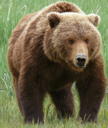

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128)

In [12]:
icecream_types = 'vanilla','chocolate','strawberry'
path = Path('ice creams 2')

In [12]:
if not path.exists():
    path.mkdir()
    for o in icecream_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} ice cream')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [16]:
fns = get_image_files(path)
fns

(#416) [Path('ice creams 2/vanilla/00000053.jpg'),Path('ice creams 2/vanilla/00000093.jpg'),Path('ice creams 2/vanilla/00000079.jpg'),Path('ice creams 2/vanilla/00000020.jpg'),Path('ice creams 2/vanilla/00000011.jpg'),Path('ice creams 2/vanilla/00000144.jpg'),Path('ice creams 2/vanilla/00000083.jpg'),Path('ice creams 2/vanilla/00000072.jpg'),Path('ice creams 2/vanilla/00000051.jpg'),Path('ice creams 2/vanilla/00000075.jpg')...]

In [17]:
failed = verify_images(fns)
failed

(#0) []

In [15]:
failed.map(Path.unlink);

In [9]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [10]:
icecreams = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [13]:
dls = icecreams.dataloaders(path)


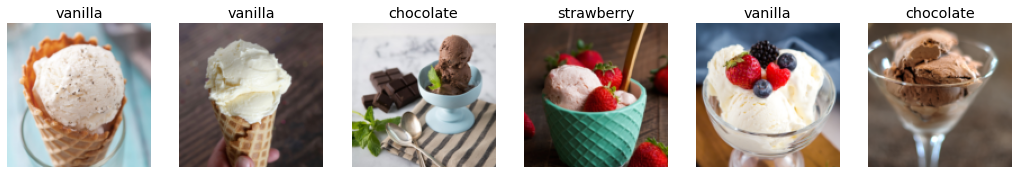

In [14]:
dls.valid.show_batch(max_n=6, nrows=1)

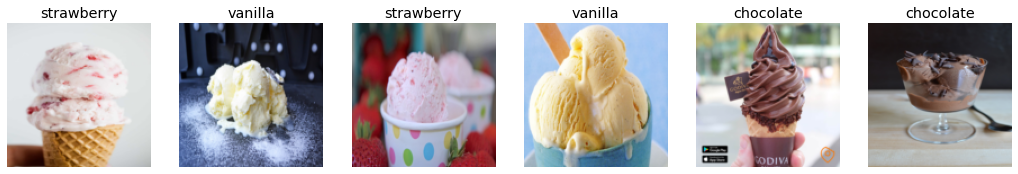

In [ ]:
icecreams = icecreams.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = icecreams.dataloaders(path)
dls.valid.show_batch(max_n=6, nrows=1)

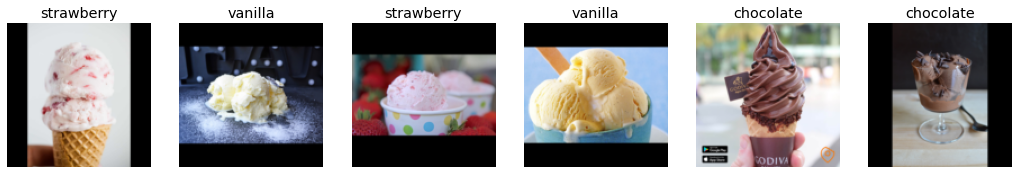

In [ ]:
icecreams = icecreams.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = icecreams.dataloaders(path)
dls.valid.show_batch(max_n=6, nrows=1)


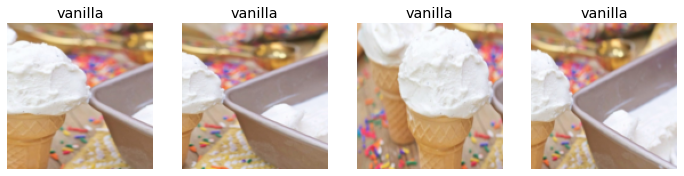

In [ ]:
icecreams = icecreams.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = icecreams.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

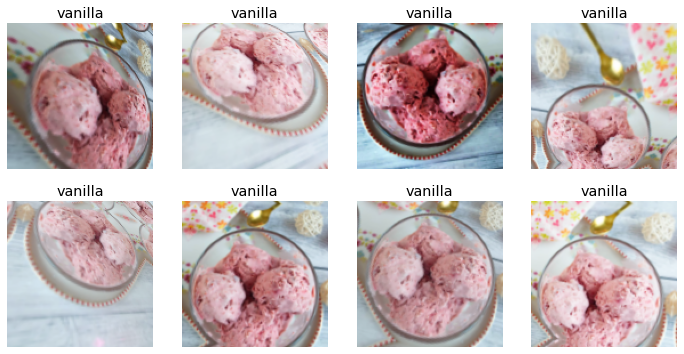

In [15]:
icecreams = icecreams.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = icecreams.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [16]:

icecreams = icecreams.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = icecreams.dataloaders(path)

In [17]:
icecreams = icecreams.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = icecreams.dataloaders(path)

In [18]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.660154,0.835768,0.346774,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.846958,0.540888,0.193548,00:17
1,0.694052,0.444634,0.169355,00:17
2,0.561824,0.415418,0.112903,00:17
3,0.454522,0.395454,0.104839,00:17


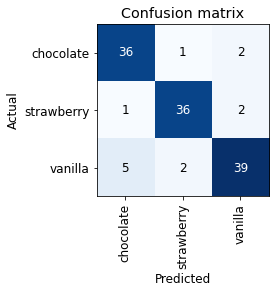

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


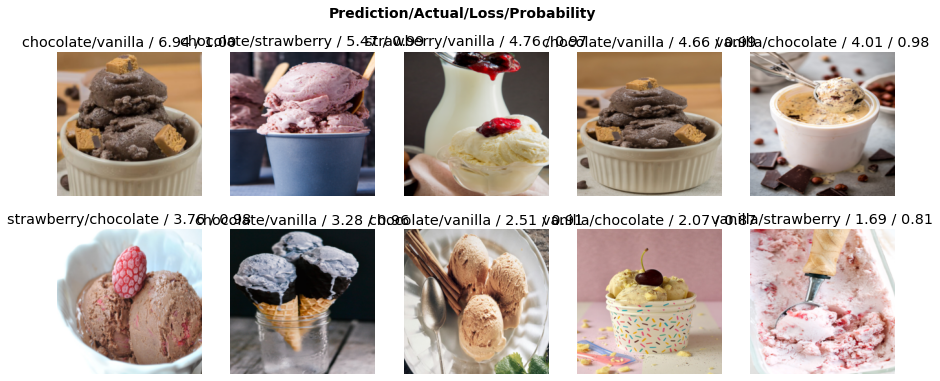

In [20]:
interp.plot_top_losses(10, nrows=2)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [21]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [24]:
img = PILImage.create(btn_upload.data[-1])

In [25]:

pred,pred_idx,probs = learn.predict(img)

In [26]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: chocolate; Probability: 1.0000')

In [27]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

  Using cached https://files.pythonhosted.org/packages/13/2f/acbe7006548f3914456ee47f97a2033b1b2f3daf921b12ac94105d87c163/nbconvert-6.0.7-py3-none-any.whl
     |████████████████████████████████| 430kB 21.8MB/s 
ERROR: nbdev 1.1.14 has requirement nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1 which is incompatible.
  Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
  Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1


Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?


In [31]:
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [32]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: chocolate; Probability: 1.0000')

In [33]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [34]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [35]:
btn_upload = widgets.FileUpload()

In [36]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
learn.export()


In [ ]:

path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]